In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import requests

url = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"
response = requests.get(url)

if response.status_code == 200:
    with open("data.csv", "wb") as file:
        file.write(response.content)
    print("Dataset downloaded and saved as data.csv")
else:
    print("Failed to download the dataset")

Dataset downloaded and saved as data.csv


In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [5]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [6]:
strings = list(df.dtypes[df.dtypes == 'object'].index)

In [7]:
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [8]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [9]:
pricelogs = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

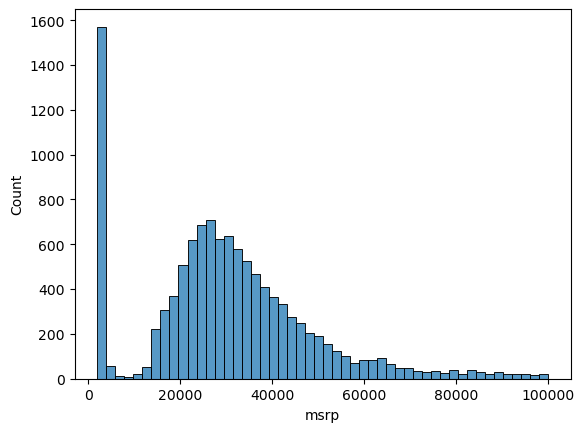

In [10]:
sns.histplot(df.msrp[df.msrp<100000], bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

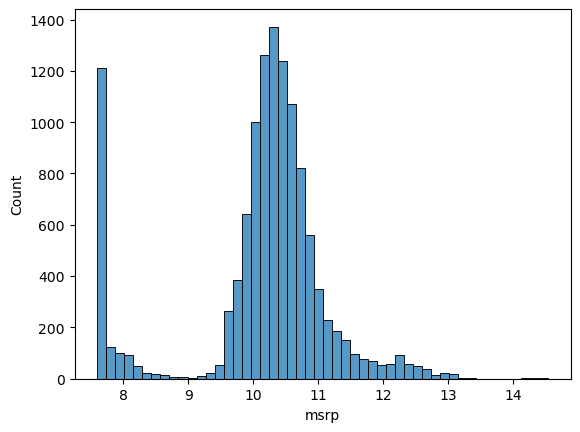

In [11]:
sns.histplot(pricelogs, bins = 50)

In [12]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

buraya kadar herşey normal

In [13]:
len(df)

11914

Datasetimizin uzunluğuunu görüyoruz buradan.

In [14]:
n = len(df)

In [15]:
n_val = int( n * 0.2)
n_test = int (n * 0.2)
n_train = n - n_val - n_test



In [16]:
print(n , n_train+ n_test + n_val)

11914 11914


In [17]:
n_val, n_train , n_test

(2382, 7150, 2382)

In [18]:
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val: n_val + n_test]
df_train = df.iloc[n_val+n_test : ]

buna random katmamız lazım aksi durumda düzgün örneklemler alamayız. Bu da sağlıklı veri toplayamadığımız için sağlıklı sonuçlar üretemememize sebebiyet verecektir.

In [19]:
idx = np.arange(n)

In [20]:
np.random.seed(2)
np.random.shuffle(idx)


In [21]:
df_train = df.iloc[idx[:n_train]]
df_val= df.iloc[idx[n_train: n_train + n_val]]
df_test = df.iloc[idx[n_val+n_train : ]]

In [22]:
df_train = df_train.reset_index(drop=True)

In [23]:
df_val = df_val.reset_index(drop=True)

In [24]:
df_test = df_test.reset_index(drop=True)

In [25]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [26]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [28]:
len(df_train)

7150

## 2.8 Car price baseline model

In [29]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [30]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [31]:
df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [32]:
df_train[base].values

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [33]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [37]:
X_train = df_train[base].fillna(0).values

In [38]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:] 

In [39]:
w0, w = train_linear_regression(X_train,y_train)

In [44]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

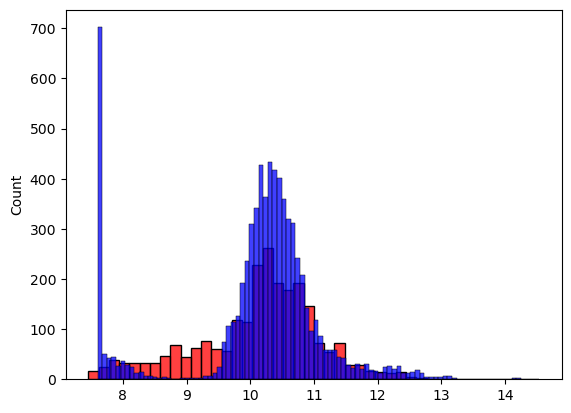

In [68]:
sns.histplot(y_pred, color='red')
sns.histplot(y_train, color = 'blue')

## 2.9 RMSE

In [53]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)
    

In [54]:
rmse(y_train, y_pred)

0.7554192603920132

In [55]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [56]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.7616530991301608

In [63]:
def prepare_X(df):
    df['age'] = 2017/ - df.year
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [64]:
X_train = prepare_X(df_train)

In [65]:
df_train.dtypes


make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
age                  float64
dtype: object

In [67]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

0.5158484966499814